In [49]:
import netCDF4
from pylab import *
import numpy as np

In [50]:
# OBS
ncfile='/home/jcharrel/Documents/stage_M2/data/CALIPSO/3D_CloudFraction330m_2006-2012_avg_CFMIP1_sat_2.69_meter_timeave.nc'
ncobs = netCDF4.Dataset(ncfile)
clobs = np.nanmean(np.nanmean(ncobs.variables['clcalipso'][:],axis=0),axis=2)*1e2
latiobs = ncobs.variables['latitude'][:]
hobs = ncobs.variables['altitude'][:]

In [51]:
# LMDZ 6A
ncfile="/home/jcharrel/Documents/stage_M2/data/LMDZ6A/LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP.nc"
ncgcm = netCDF4.Dataset(ncfile)
# Annual and zonal means
cl6A = np.nanmean(np.nanmean(ncgcm.variables['clcalipso'][:],axis=0),axis=2)*1e2
lati = ncgcm.variables['lat'][:]
height = ncgcm.variables['height'][:]

In [52]:
print('Max de couverture nuageuse dans GOCCP :', np.max(clobs))
print('Moyenne de couverture nuageuse dans GOCCP :', np.mean(clobs))
print('Max de couverture nuageuse dans LMDZ6A :', np.max(cl6A))

Max de couverture nuageuse dans GOCCP : 24.489594
Moyenne de couverture nuageuse dans GOCCP : 5.509176710175305
Max de couverture nuageuse dans LMDZ6A : 33.282055


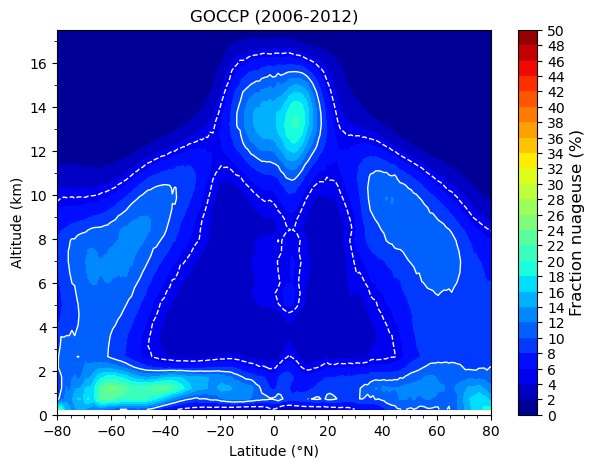

In [54]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(7,5))
fmin = 0.
fmax = 30.
ncontour = 20

pltcounter = 0
field=clobs
xaxis=latiobs
yaxis=hobs/1e3

cbarticks = np.linspace(fmin, fmax, ncontour+1)
clevs = np.arange(0, 51, 2)
cldplot = plt.contour(xaxis, yaxis, field, 1, levels=[5], linewidths=1.0,
                    linestyles='dashed', colors='white')
cldplot = plt.contour(xaxis, yaxis, field, 1, levels=[10], linewidths=1.0, 
                    linestyles='solid', colors='white')
cldplot = plt.contourf(xaxis, yaxis, field, clevs, cmap='jet')

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.xlabel('Latitude (°N)')
plt.ylabel('Altitude (km)')
plt.title('GOCCP (2006-2012)')
plt.xlim(-80, 80)
plt.ylim(0, 17.5)
cb=plt.colorbar(cldplot, ticks=clevs)
cb.set_label('Fraction nuageuse (%)', fontsize=12)
plt.show()

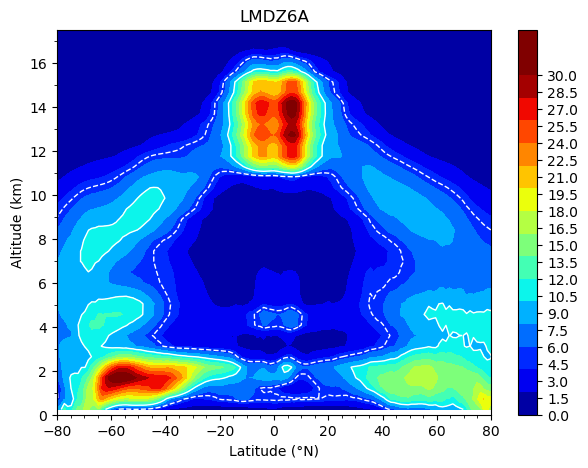

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(7,5))
fmin = 0.
fmax = 30.
ncontour = 20

pltcounter = 0
field=cl6A
xaxis=lati
yaxis=height/1e3

cbarticks = np.linspace(fmin, fmax, ncontour+1)

cldplot = plt.contour(xaxis, yaxis, field, 1, levels=[5], linewidths=1.0,
                    linestyles='dashed', colors='white')
cldplot = plt.contour(xaxis, yaxis, field, 1, levels=[10], linewidths=1.0, 
                    linestyles='solid', colors='white')
cldplot = plt.contourf(xaxis, yaxis, field, ncontour, cmap='jet', vmax=fmax, vmin=fmin)

ax = plt.gca()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(5))
ax.yaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_minor_locator(MultipleLocator(1))

plt.xlabel('Latitude (°N)')
plt.ylabel('Altitude (km)')
plt.xlim(-80, 80)
plt.ylim(0, 17.5)
plt.title('LMDZ6A')
plt.colorbar(cldplot, ticks=cbarticks)
plt.show()